In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # numpy arrays / linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px # map plot
import warnings
warnings.filterwarnings('ignore') 

import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
from scipy.optimize import curve_fit # predictive modeling
import seaborn as sns
import statsmodels.api as sm

import datetime
from datetime import date

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/country_vaccinations.csv', index_col='date', parse_dates=True, engine='python', header=0)
df = df[df['vaccines']=='Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac']['total_vaccinations']
df.dropna(inplace=True)
df = df.reset_index()
df.head()

,date,total_vaccinations
0,2020-12-15,1500000.0
1,2020-12-31,4500000.0
2,2021-01-09,9000000.0
3,2021-01-13,10000000.0
4,2021-01-20,15000000.0


In [ ]:
df=df.rename(columns={'date':'ds', 'total_vaccinations':'y'})
df.head()

,ds,y
0,2020-12-15,1500000.0
1,2020-12-31,4500000.0
2,2021-01-09,9000000.0
3,2021-01-13,10000000.0
4,2021-01-20,15000000.0


In [ ]:
from fbprophet import Prophet
model = Prophet(daily_seasonality=True)
model.fit(df);

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=60, freq = 'd')
future.tail()

,ds
113,2021-07-01
114,2021-07-02
115,2021-07-03
116,2021-07-04
117,2021-07-05


In [ ]:
forecast = model.predict(future)

In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
113,2021-07-01,6.705261e+08,6.141475e+08,7.220045e+08,6.139656e+08,7.207100e+08,6.864466e+05,6.864466e+05,6.864466e+05,699347.246323,699347.246323,699347.246323,-1.290068e+04,-1.290068e+04,-1.290068e+04,0.0,0.0,0.0,6.712125e+08
114,2021-07-02,6.771686e+08,6.216502e+08,7.318220e+08,6.186238e+08,7.290194e+08,3.004306e+06,3.004306e+06,3.004306e+06,699347.246323,699347.246323,699347.246323,2.304959e+06,2.304959e+06,2.304959e+06,0.0,0.0,0.0,6.801729e+08
115,2021-07-03,6.838111e+08,6.258757e+08,7.395016e+08,6.234797e+08,7.369773e+08,2.189580e+06,2.189580e+06,2.189580e+06,699347.246323,699347.246323,699347.246323,1.490232e+06,1.490232e+06,1.490232e+06,0.0,0.0,0.0,6.860007e+08
116,2021-07-04,6.904536e+08,6.280171e+08,7.446853e+08,6.283538e+08,7.453083e+08,-1.324883e+05,-1.324883e+05,-1.324883e+05,699347.246323,699347.246323,699347.246323,-8.318356e+05,-8.318356e+05,-8.318356e+05,0.0,0.0,0.0,6.903211e+08
117,2021-07-05,6.970961e+08,6.332544e+08,7.535284e+08,6.332285e+08,7.531826e+08,-7.153827e+03,-7.153827e+03,-7.153827e+03,699347.246323,699347.246323,699347.246323,-7.065011e+05,-7.065011e+05,-7.065011e+05,0.0,0.0,0.0,6.970889e+08


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
108,2021-06-26,6.395032e+08,5.914318e+08,6.841666e+08
109,2021-06-27,6.438236e+08,5.935001e+08,6.893528e+08
110,2021-06-28,6.505915e+08,5.977907e+08,6.980254e+08
111,2021-06-29,6.573154e+08,6.036709e+08,7.055478e+08
112,2021-06-30,6.629641e+08,6.076408e+08,7.121722e+08
113,2021-07-01,6.712125e+08,6.141475e+08,7.220045e+08
114,2021-07-02,6.801729e+08,6.216502e+08,7.318220e+08
115,2021-07-03,6.860007e+08,6.258757e+08,7.395016e+08
116,2021-07-04,6.903211e+08,6.280171e+08,7.446853e+08
117,2021-07-05,6.970889e+08,6.332544e+08,7.535284e+08


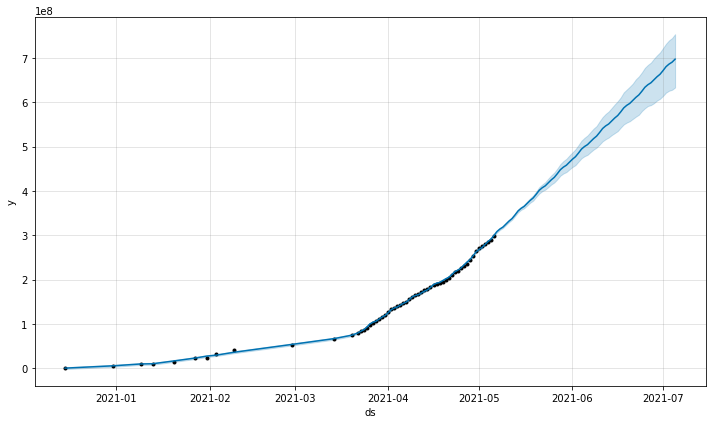

In [ ]:
model.plot(forecast);

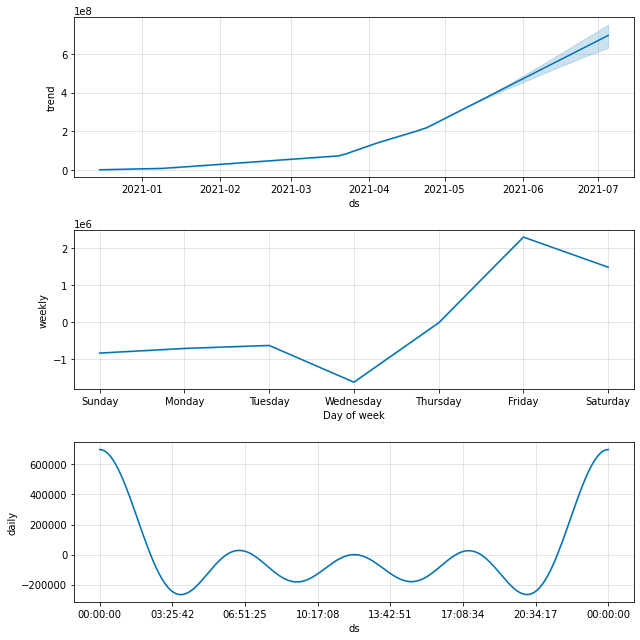

In [ ]:
model.plot_components(forecast);

In [ ]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

In [ ]:
metric_df.dropna(inplace=True)
metric_df.tail()

,ds,yhat,y
53,2021-05-02,2.718441e+08,275338000.0
54,2021-05-03,2.786120e+08,279905000.0
55,2021-05-04,2.853359e+08,284595000.0
56,2021-05-05,2.909845e+08,289627000.0
57,2021-05-06,2.992330e+08,297734000.0


In [ ]:
from sklearn.metrics import r2_score
r2_score(metric_df.y, metric_df.yhat)

0.999591853579626

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(metric_df.y, metric_df.yhat)

2797862243366.1426

In [ ]:
metric_df.yhat.mean()

149002598.2124216

In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(metric_df.y, metric_df.yhat))

1353209.451508771


In [ ]:
from sklearn.metrics import median_absolute_error
print(median_absolute_error(metric_df.y, metric_df.yhat))

1212807.897076413


In [ ]:
from math import sqrt
rmse = sqrt(mean_squared_error(metric_df.y, metric_df.yhat))
print(rmse)

1672681.154125359
